<a href="https://colab.research.google.com/github/Mohor35/CSE22005_ml/blob/main/CSE22005_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 4

Question A1

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Thyroid.xlsx to Thyroid.xlsx


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


df = pd.read_excel('Thyroid.xlsx')

print(df.columns)


print(df.head())


X = df.drop(columns=['Record ID', 'Condition'])
y = df['Condition']


X = pd.get_dummies(X)


X.replace('?', np.nan, inplace=True)
X = X.astype(float)
X.fillna(X.median(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

report_train = classification_report(y_train, y_train_pred, output_dict=True)
report_test = classification_report(y_test, y_test_pred, output_dict=True)


print("Confusion Matrix (Training Data):")
print(cm_train)

print("\nConfusion Matrix (Test Data):")
print(cm_test)

print("\nClassification Report (Training Data):")
print(report_train)

print("\nClassification Report (Test Data):")
print(report_test)


print("\nTraining Data Metrics:")
for label, metrics in report_train.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"{label}: Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1-score']:.2f}")

print("\nTest Data Metrics:")
for label, metrics in report_test.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"{label}: Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1-score']:.2f}")

def analyze_fit(train_report, test_report):
    train_f1 = np.mean([metrics['f1-score'] for label, metrics in train_report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']])
    test_f1 = np.mean([metrics['f1-score'] for label, metrics in test_report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']])

    if test_f1 < 0.5:
        print("\nThe model might be underfitting.")
    elif train_f1 > test_f1:
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting the data well.")

analyze_fit(report_train, report_test)


Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Confusion Matrix (Training Data):
[[28  0  1 ...  0  0  0]
 [ 1  4  0 ...  0  0  0]
 [ 1  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 23]]

Confusion Matrix (Test Data):
[[   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   34    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   10    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    6    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Question A2

In [10]:
from google.colab import files
uploaded = files.upload()

Saving IRCTC stock price.xlsx to IRCTC stock price.xlsx


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


df = pd.read_excel('IRCTC stock price.xlsx')


print(df.head())
print(df.columns)


X = df.drop(columns=['Price'])
y = df['Price']


X = pd.get_dummies(X)


X.replace('?', np.nan, inplace=True)
X = X.astype(float)
X.fillna(X.median(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.2f}")


def analyze_results(mse, rmse, mape, r2):
    print("\nAnalysis:")
    if r2 < 0:
        print("The model performs poorly, as the R² score is negative.")
    elif r2 < 0.5:
        print("The model has a low predictive power, as the R² score is below 0.5.")
    elif r2 < 0.8:
        print("The model has a moderate predictive power.")
    else:
        print("The model has a high predictive power, as the R² score is above 0.8.")

    print(f"High MSE and RMSE values indicate larger prediction errors.")
    print(f"High MAPE values indicate significant prediction errors relative to the actual values.")

analyze_results(mse, rmse, mape, r2)


           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  
Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')
Mean Squared Error (MSE): 183.46
Root Mean Squared Error (RMSE): 13.54
Mean Absolute Percentage Error (MAPE): 0.55%
R² Score: 1.00

Analysis:
The model has a high predictive power, as the R² score is above 0.8.
High MSE and RMSE values indicate larger prediction errors.
High MAPE values indicate significant prediction errors relative to the actual values.


Question A3

Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


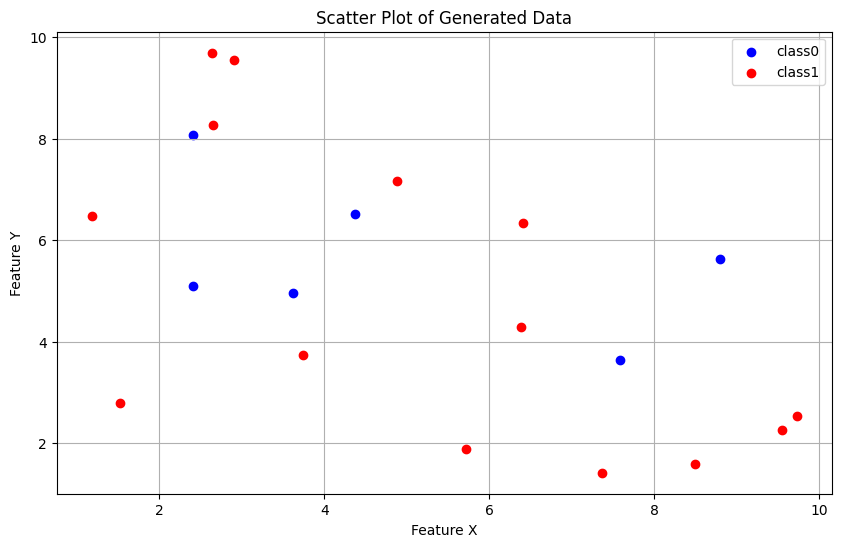

           X         Y   Class
0   4.370861  6.506676  class0
1   9.556429  2.255445  class1
2   7.587945  3.629302  class0
3   6.387926  4.297257  class1
4   2.404168  5.104630  class0
5   2.403951  8.066584  class0
6   1.522753  2.797064  class1
7   8.795585  5.628110  class0
8   6.410035  6.331731  class1
9   7.372653  1.418054  class1
10  1.185260  6.467904  class1
11  9.729189  2.534717  class1
12  8.491984  1.585464  class1
13  2.911052  9.539970  class1
14  2.636425  9.690688  class1
15  2.650641  8.275576  class1
16  3.738180  3.741524  class1
17  5.722808  1.879049  class1
18  4.887505  7.158097  class1
19  3.621062  4.961372  class0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('Thyroid.xlsx')


print(df.columns)


np.random.seed(42)


num_points = 20
X = np.random.uniform(1, 10, num_points)
Y = np.random.uniform(1, 10, num_points)


data = pd.DataFrame({'X': X, 'Y': Y})


data['Class'] = np.random.choice(['class0', 'class1'], num_points)


plt.figure(figsize=(10, 6))
colors = {'class0':'blue', 'class1':'red'}
plt.scatter(data[data['Class'] == 'class0']['X'], data[data['Class'] == 'class0']['Y'], color='blue', label='class0')
plt.scatter(data[data['Class'] == 'class1']['X'], data[data['Class'] == 'class1']['Y'], color='red', label='class1')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Generated Data')
plt.legend()
plt.grid(True)
plt.show()


print(data)


Question A4

Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


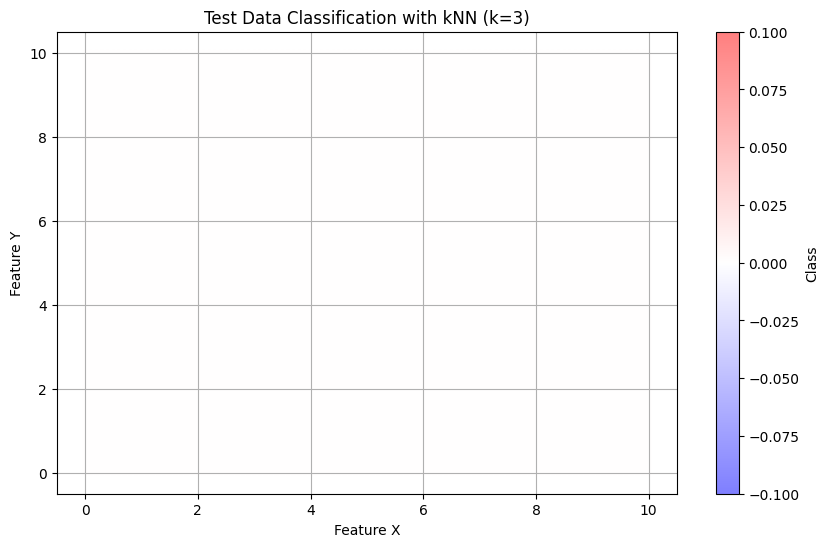

     X    Y  Predicted Class
0  0.0  0.0              0.0
1  0.1  0.0              0.0
2  0.2  0.0              0.0
3  0.3  0.0              0.0
4  0.4  0.0              0.0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


df = pd.read_excel('Thyroid.xlsx')


print(df.columns)


df = df.dropna(subset=['Condition'])


df = df.dropna()


features = df.drop(columns=['Condition'])
target = df['Condition']


features = pd.get_dummies(features)



target = target.map({'NO CONDITION': 0, 'S': 1})




target = target.dropna()



features = features.loc[target.index]



X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)



x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_grid, Y_grid = np.meshgrid(x_test, y_test)
X_test_grid = np.column_stack([X_grid.flatten(), Y_grid.flatten()])



test_data = pd.DataFrame(X_test_grid, columns=['X', 'Y'])
test_data = pd.get_dummies(test_data)



test_data = test_data.reindex(columns=features.columns, fill_value=0)



X_test_grid_scaled = scaler.transform(test_data)
test_predictions = knn.predict(X_test_grid_scaled)


plt.figure(figsize=(10, 6))


plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=test_predictions, cmap=plt.cm.bwr, marker='o', s=10, alpha=0.5)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Test Data Classification with kNN (k=3)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


print(pd.DataFrame({'X': X_test_grid[:, 0], 'Y': X_test_grid[:, 1], 'Predicted Class': test_predictions}).head())


Question A5

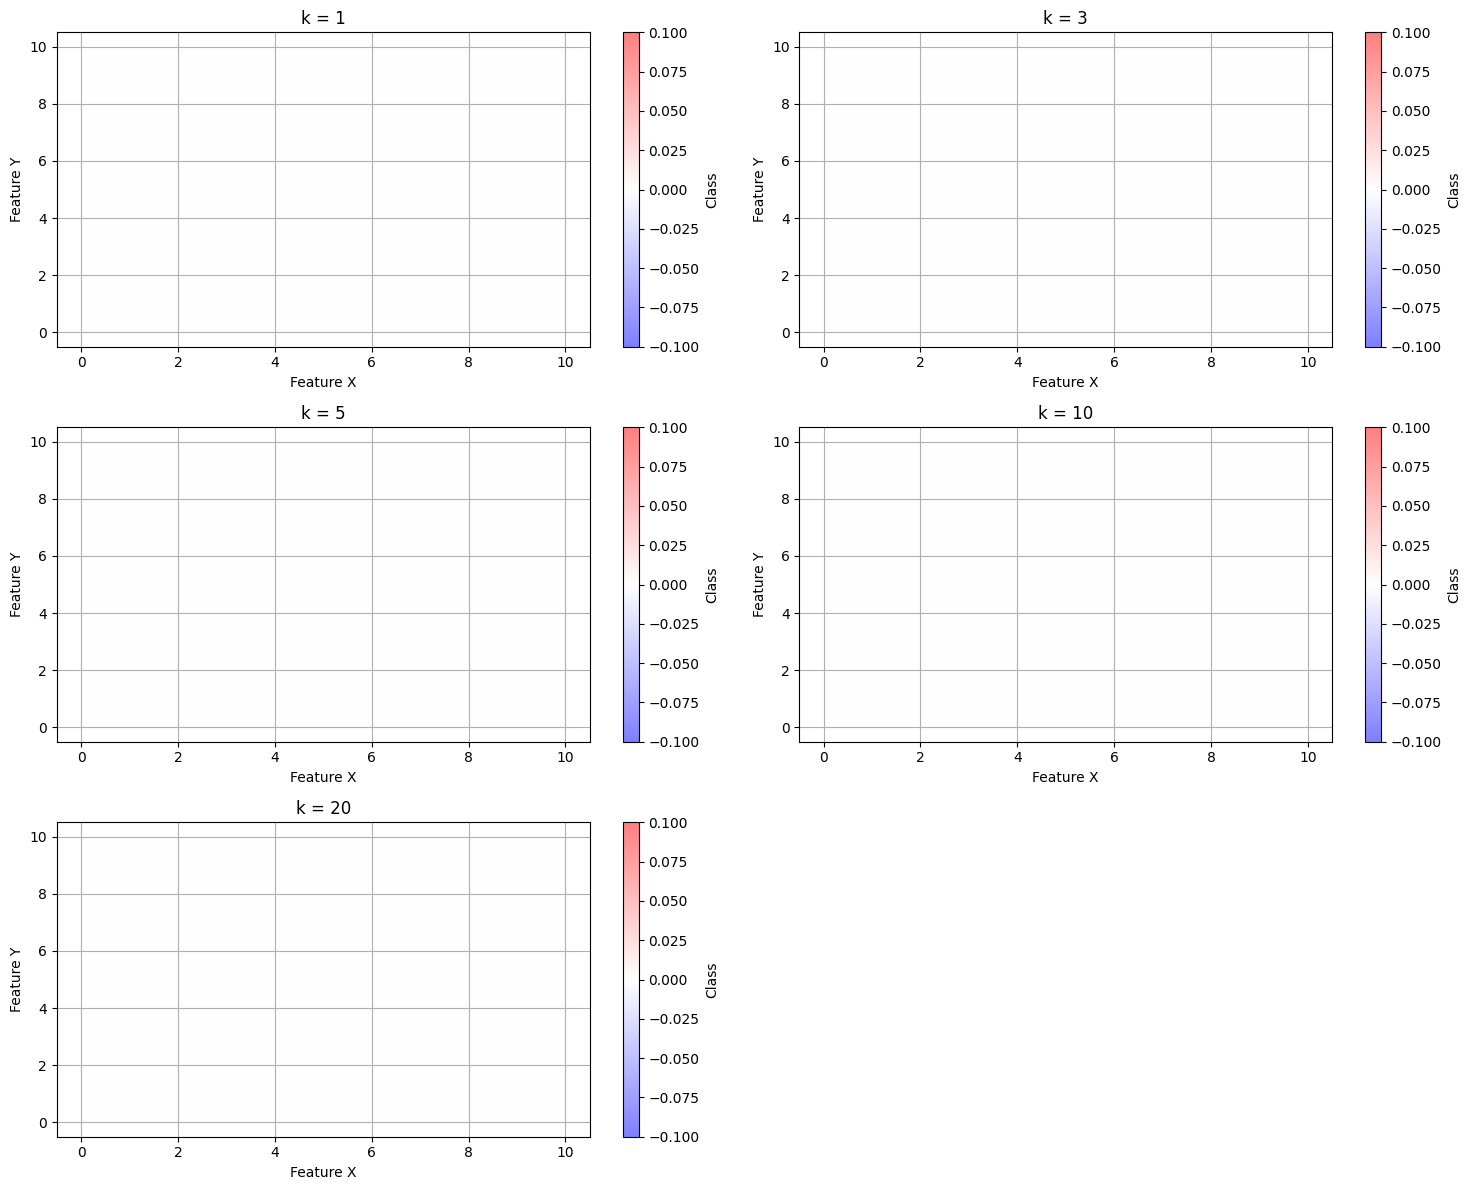

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


df = pd.read_excel('Thyroid.xlsx')


df = df.dropna(subset=['Condition'])
df = df.dropna()


features = df.drop(columns=['Condition'])
target = df['Condition']


features = pd.get_dummies(features)


target = target.map({'NO CONDITION': 0, 'S': 1})


target = target.dropna()


features = features.loc[target.index]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_grid, Y_grid = np.meshgrid(x_test, y_test)
X_test_grid = np.column_stack([X_grid.flatten(), Y_grid.flatten()])


test_data = pd.DataFrame(X_test_grid, columns=['X', 'Y'])
test_data = pd.get_dummies(test_data)


test_data = test_data.reindex(columns=features.columns, fill_value=0)


k_values = [1, 3, 5, 10, 20]


plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, 1):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    X_test_grid_scaled = scaler.transform(test_data)
    test_predictions = knn.predict(X_test_grid_scaled)


    plt.subplot(3, 2, i)
    plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=test_predictions, cmap=plt.cm.bwr, marker='o', s=10, alpha=0.5)
    plt.title(f'k = {k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.colorbar(label='Class')
    plt.grid(True)

plt.tight_layout()
plt.show()


Question A6

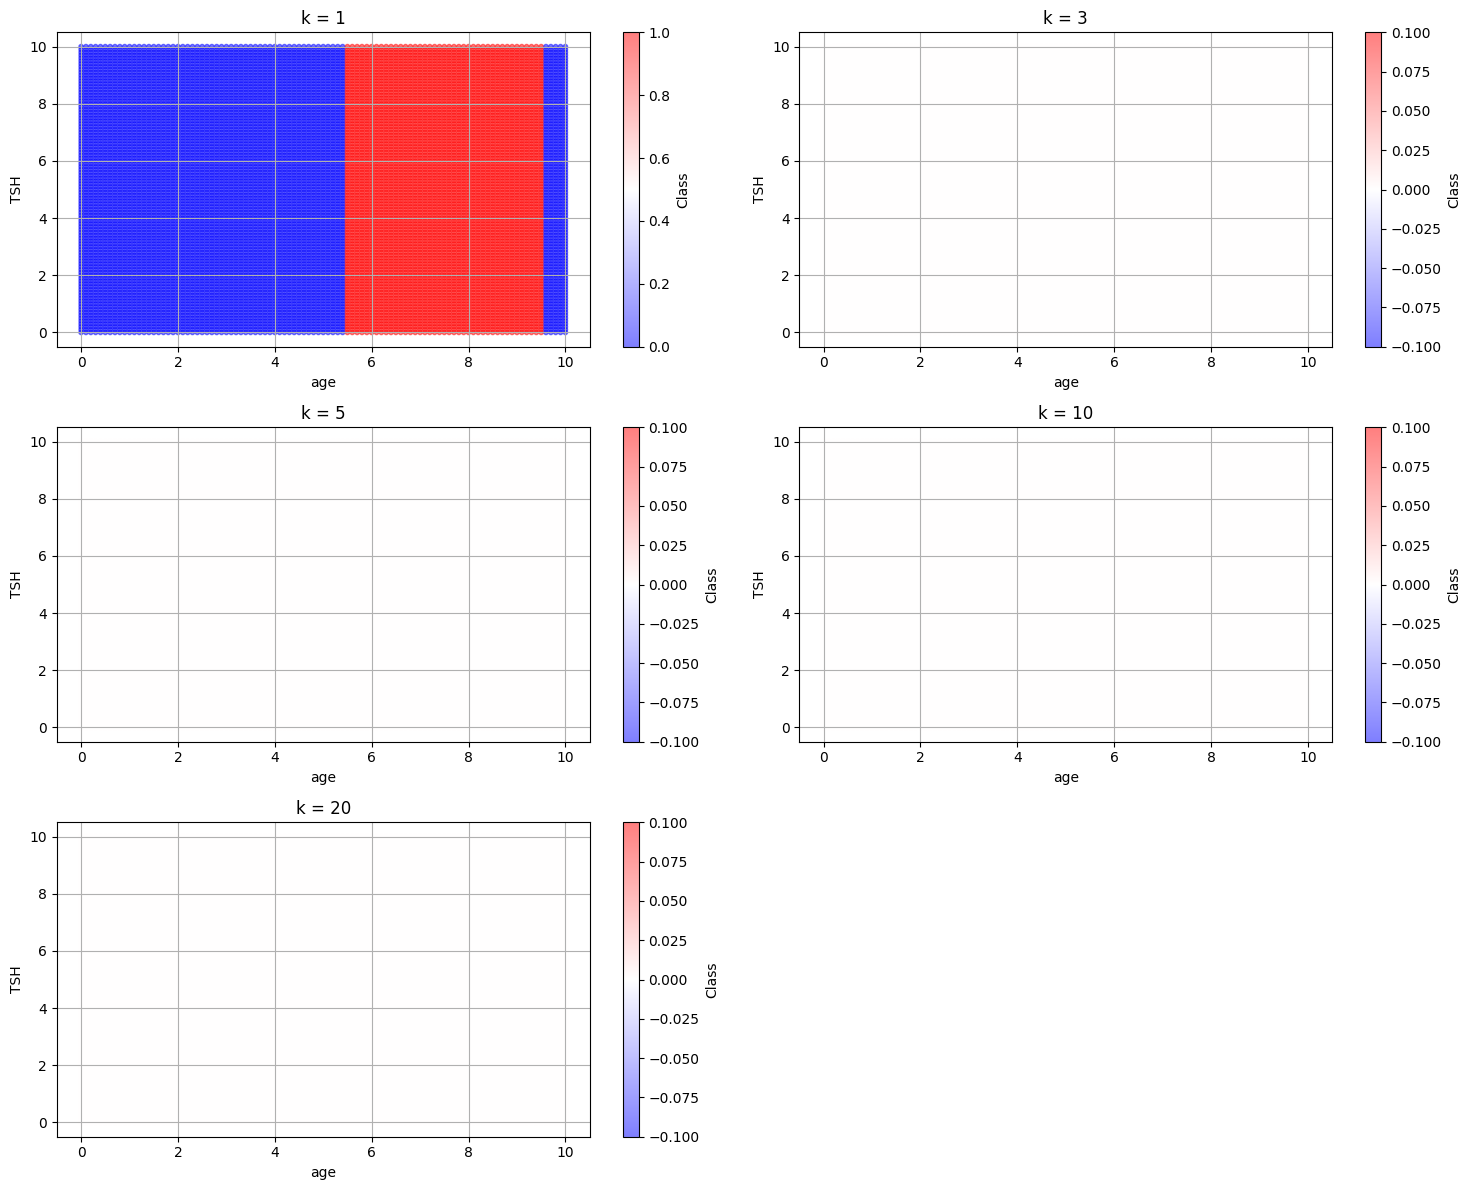

   age  TSH  Predicted Class
0  0.0  0.0              0.0
1  0.1  0.0              0.0
2  0.2  0.0              0.0
3  0.3  0.0              0.0
4  0.4  0.0              0.0


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = pd.read_excel('Thyroid.xlsx')


df = df.dropna(subset=['Condition'])
df = df.dropna()


features = df[['age', 'TSH']]
target = df['Condition']


features = pd.get_dummies(features)


target = target.map({'NO CONDITION': 0, 'S': 1})


target = target.dropna()


features = features.loc[target.index]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_grid, Y_grid = np.meshgrid(x_test, y_test)
X_test_grid = np.column_stack([X_grid.flatten(), Y_grid.flatten()])


test_data = pd.DataFrame(X_test_grid, columns=['age', 'TSH'])
test_data = pd.get_dummies(test_data)


test_data = test_data.reindex(columns=features.columns, fill_value=0)


k_values = [1, 3, 5, 10, 20]


plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, 1):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    X_test_grid_scaled = scaler.transform(test_data)
    test_predictions = knn.predict(X_test_grid_scaled)


    plt.subplot(3, 2, i)
    plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=test_predictions, cmap=plt.cm.bwr, marker='o', s=10, alpha=0.5)
    plt.title(f'k = {k}')
    plt.xlabel('age')
    plt.ylabel('TSH')
    plt.colorbar(label='Class')
    plt.grid(True)

plt.tight_layout()
plt.show()


print(pd.DataFrame({'age': X_test_grid[:, 0], 'TSH': X_test_grid[:, 1], 'Predicted Class': test_predictions}).head())


Question A7

Best k value: 11
Best cross-validation accuracy: 0.9867


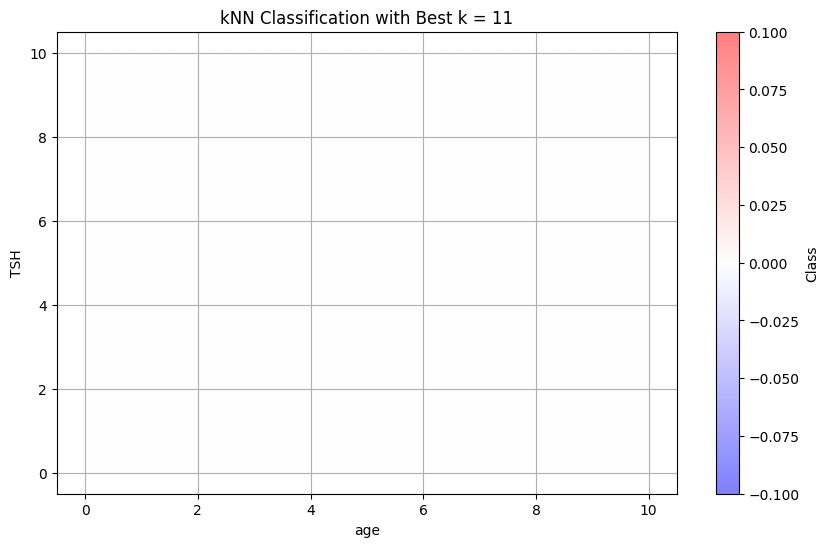

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


df = pd.read_excel('Thyroid.xlsx')


df = df.dropna(subset=['Condition'])
df = df.dropna()


features = df[['age', 'TSH']]
target = df['Condition']


features = pd.get_dummies(features)


target = target.map({'NO CONDITION': 0, 'S': 1})


target = target.dropna()


features = features.loc[target.index]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 20, 25]
}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)


x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_grid, Y_grid = np.meshgrid(x_test, y_test)
X_test_grid = np.column_stack([X_grid.flatten(), Y_grid.flatten()])


test_data = pd.DataFrame(X_test_grid, columns=['age', 'TSH'])
test_data = pd.get_dummies(test_data)


test_data = test_data.reindex(columns=features.columns, fill_value=0)


X_test_grid_scaled = scaler.transform(test_data)
test_predictions = knn_best.predict(X_test_grid_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=test_predictions, cmap=plt.cm.bwr, marker='o', s=10, alpha=0.5)
plt.title(f'kNN Classification with Best k = {best_k}')
plt.xlabel('age')
plt.ylabel('TSH')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()
